In [1]:
using Plots
using Random

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [2]:
mutable struct track
    road::BitArray
end

function track(n::Int64)
    track(falses(n,n))
end

track

In [6]:
function right!(tr::track,pos::Int64,dir::Int64,larg::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = trues(larg)
        end
        pos = pos-1
    end
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = trues(larg)
        end
        pos = pos+n
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = trues(larg)
        end
        pos = pos+1
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = trues(larg)
        end
        pos = pos-n
    end
    
    r[pos]=true
    dir = dir-1
    
    (pos,dir)
end


function left!(tr::track,pos::Int64,dir::Int64,larg::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = trues(larg)
        end
        pos = pos+(larg)*(n+1)-n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = trues(larg)
        end
        pos = pos-(larg)*(n-1)-1
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = trues(larg)
        end
        pos = pos-(larg)*(n+1)+n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = trues(larg)
        end
        pos = pos+(larg)*(n-1)+1
    end
    
    
    r[pos]=true
    dir = dir+1
    
    (pos,dir)
end

function droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,long::Int64)
    r = tr.road
    dir2 = dir%4

    if dir2 == 0
        for i in 0:long-1
            r[pos + i*n : pos + (larg-1) + i*n] = trues(larg)
        end
        pos = pos+(long)*n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos - i*n + (long-1)] = trues(long)
        end
        pos = pos+long
    end
    
    if dir2 == 2
        for i in 0:long-1
            r[pos - i*n - (larg-1) : pos - i*n] = trues(larg)
        end
        pos = pos-(long)*n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (long-1) : pos + i*n] = trues(long)
        end
        pos = pos-long
    end
    
    r[pos]=true
    (pos,dir)
end

function long!(tr::track,pos::Int64,dir::Int64,larg::Int64)
    droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,12)
end

function short!(tr::track,pos::Int64,dir::Int64,larg::Int64)
    droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,3)
end

n = 100
R = track(n)
pos = 5550
larg = 6

R.road[5550 + 1] = true
dir = 23
left!(R,pos,dir,larg)

#plot(heatmap(R.road),size=(650,600))

(6145, 24)

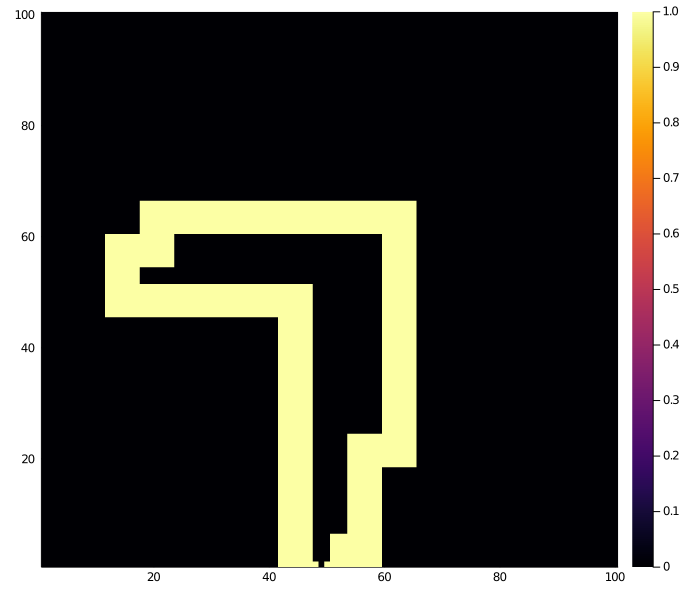

In [8]:
function build!(tr::track,L::Array{Int64})
    pos = 5001
    dir = 100
    tr.road[5001-n] = true
    for i in L
        if i == 1
            (pos,dir) = short!(tr,pos,dir,larg)
        end
        
        if i == 2
            (pos,dir) = long!(tr,pos,dir,larg)
        end
        
        if i == 3
            (pos,dir) = right!(tr,pos,dir,larg)
        end
        
        if i == 4
            (pos,dir) = left!(tr,pos,dir,larg)
        end
    end
end


R1 = track(n)
L = [1,4,2,3,4,2,2,2,4,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]
#L = [1,4,2]

build!(R1,L)
plot(heatmap(R1.road),size=(700,600))

In [9]:
mutable struct ind
    genes::Array{Float64}
    fitness::Float64
end

function ind(x::Float64,y::Float64)
    ind([x,y],0)
end

ind

In [10]:
function mutate!(Ind::ind,dx::Float64)
    
    




ind([3.4, 5.0], 0.0)